In [208]:
import pandas as pd
import numpy as np
import MakeImg
import splusdata
import astropy
from astropy import wcs
from astropy import coordinates as coord
from astropy import units as u

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

In [42]:
df = pd.read_csv('/home/gustavo/Documents/Tables/Classification-IDR3')
df1 = pd.read_csv('/home/gustavo/Documents/Tables/CMzoo2.csv')

In [ ]:
## 2 Merger
## 3 Spiral
## 1 Lenticular
## 0 Elliptical
## 4 MergerAs

In [107]:
selected = df1[['Field', 'ID_1', 'RA_1a', 'DEC_1a', 'class_2a']]
selected = selected.rename(columns={'ID_1': 'ID', 'RA_1a': 'RA', 'DEC_1a': 'DEC'})

In [108]:
selected

,Field,ID,RA,DEC,class_2a
0,STRIPE82-0001,iDR3.STRIPE82-0001.007587,0.055946,-1.213567,2
1,STRIPE82-0001,iDR3.STRIPE82-0001.008308,0.166390,-1.191210,1
2,STRIPE82-0001,iDR3.STRIPE82-0001.009660,359.740848,-1.157424,1
3,STRIPE82-0001,iDR3.STRIPE82-0001.016053,359.607740,-0.965546,1
4,STRIPE82-0001,iDR3.STRIPE82-0001.017410,359.694574,-0.926933,1
...,...,...,...,...,...
2491,STRIPE82-0170,iDR3.STRIPE82-0170.041796,358.752746,0.903717,2
2492,STRIPE82-0170,iDR3.STRIPE82-0170.042636,358.424478,0.916757,1
2493,STRIPE82-0170,iDR3.STRIPE82-0170.043399,358.166700,0.940321,2
2494,STRIPE82-0170,iDR3.STRIPE82-0170.043693,359.141104,0.954929,1


In [109]:
df

,Field,ID,RA_1a,DEC_1a,X_1,Y_1,ISOarea_1,MU_MAX,A_1,B_1,...,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag,simple_class,Separation_2a,class_1a,index,ID_2,Class_2,Separation
0,STRIPE82-0001,iDR3.STRIPE82-0001.007587,0.055946,-1.213567,5134.3755,2138.8760,524,15.760947,7.926331,4.640517,...,0.163,0.163,0,Merger,0.000252,2,437,SPLUS.STRIPE82-0001.03521.griz,MergerObj,0.246082
1,STRIPE82-0001,iDR3.STRIPE82-0001.026076,0.644671,-0.682339,1280.9552,5615.8180,644,14.044785,7.362769,4.799259,...,0.000,0.000,0,Merger,0.000161,2,470,SPLUS.STRIPE82-0001.27137.griz,MergerObj,0.040632
2,STRIPE82-0001,iDR3.STRIPE82-0001.034636,0.032594,-0.040554,5287.1450,9817.0620,1503,14.388269,9.271545,8.787182,...,0.457,0.457,0,Spiral,0.000000,3,0,SPLUS.STRIPE82-0001.13791.griz,Spiral,0.099936
3,STRIPE82-0001,iDR3.STRIPE82-0001.049445,359.391467,-0.109424,9483.9770,9366.1870,329,14.945756,4.651006,4.375792,...,0.143,0.143,0,Merger,0.009144,2,158,SPLUS.STRIPE82-0001.15853.griz,MergerObj,0.239152
4,STRIPE82-0002,iDR3.STRIPE82-0002.013360,359.806127,0.234110,6769.5254,2450.9783,721,15.482730,26.986595,8.831202,...,0.000,0.000,0,Merger,0.031176,2,193,SPLUS.STRIPE82-0002.06705.griz,MergerObj,0.494746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,STRIPE82-0170,iDR3.STRIPE82-0170.040673,358.251861,0.870484,7665.6226,6616.4966,283,14.258256,4.280854,3.990124,...,0.000,0.000,0,Merger,0.024549,2,613,SPLUS.STRIPE82-0170.28780.griz,MergerObj,0.165810
724,STRIPE82-0170,iDR3.STRIPE82-0170.041796,358.752746,0.903717,4387.4507,6833.9530,252,15.464162,5.246682,3.556437,...,0.000,0.000,0,Merger,0.010655,2,614,SPLUS.STRIPE82-0170.27832.griz,Leave,0.365865
725,STRIPE82-0170,iDR3.STRIPE82-0170.043399,358.166700,0.940321,8222.9660,7073.6816,295,14.833832,5.103942,4.785085,...,0.000,0.000,0,Merger,0.023613,2,612,SPLUS.STRIPE82-0170.27075.griz,MergerObj,0.223268
726,STRIPE82-0170,iDR3.STRIPE82-0170.043693,359.141104,0.954929,1845.6976,7169.4375,233,15.365420,6.164695,2.701989,...,0.000,0.000,0,Lenticular,0.044094,1,615,SPLUS.STRIPE82-0170.26359.griz,MergerObj,0.367771


In [112]:
for key, value in df.iterrows():

    if value.Class_2 == 'MergerObj':
        selected.loc[selected['ID'] == value.ID, ['class_2a']] = 2
    if value.Class_2 == 'MergerAs':
        selected.loc[selected['ID'] == value.ID, ['class_2a']] = 4
        

In [113]:
selected['class_2a'].value_counts()

0    768
1    748
2    461
3    431
4     88
Name: class_2a, dtype: int64

In [116]:
classes = 5

In [121]:
final_sample = pd.DataFrame()
for cls in range(classes):
    sampleobj = selected[selected['class_2a'] == cls].sample(n=20)
    
    final_sample = pd.concat([final_sample, sampleobj])

In [124]:
bands = ["R", "G", "I", "U", "Z", "F378", "F395", "F410", "F430", "F515", "F660", "F861"]

path = '/media/gustavo/Seagate Expansion Drive/all_coadded'
pathdict = {}

array_of_imgs = []

for key, value in final_sample.iterrows():
    for band in bands:
        c = coord.SkyCoord(ra=value.RA, dec=value.DEC, unit=(u.degree, u.degree))
        try:
            hdu = astropy.io.fits.open(f'{path}/{value.Field}/{value.Field}_{band}_swp.fz')
        except:
            hdu = astropy.io.fits.open(f'{path}/{value.Field}/{value.Field}_{band}_swp.fits')

        try:

            w = wcs.WCS(hdu[1].header)
            data = astropy.nddata.utils.Cutout2D(hdu[1].data, c, 128, wcs = w)
           
        except:

            w = wcs.WCS(hdu[0].header)
            data = astropy.nddata.utils.Cutout2D(hdu[0].data, c, 128, wcs = w)
        
         
        del hdu
        pathdict[band] = data.data

    img = MakeImg.MakeImg_data(pathdict, dx = 128, dy = 128, noiselum = 0.135, satpercent = 0.15, colorsatfac = 2).get_array()
    array_of_imgs.append(img)

    if key % 10 == 0:
        print('done += 10')
            
    # newfits = astropy.io.fits.PrimaryHDU()
    # newfits.header = hdu[1].header
    # newfits.header.update(data.wcs.to_header())

    # newfits.data = data.data

done += 10
done += 10
done += 10
done += 10
done += 10
done += 10
done += 10
done += 10


In [261]:
learning_rate = 0.003
meta_step_size = 0.25

inner_batch_size = 25
eval_batch_size = 25

meta_iters = 2000
eval_iters = 5
inner_iters = 4

eval_interval = 1
train_shots = 16
shots = 20
classes = 5

labels = final_sample['class_2a'].to_numpy()

In [191]:
X_train, X_test, y_train, y_test = train_test_split(array_of_imgs, labels, test_size=0.20, random_state=42)

In [200]:
y_train

array([2, 4, 1, 2, 3, 0, 2, 4, 0, 3, 0, 2, 4, 1, 4, 0, 3, 3, 1, 0, 2, 1,
       0, 4, 1, 0, 4, 1, 3, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 4, 2, 4, 2, 2,
       2, 3, 2, 3, 3, 4, 3, 2, 2, 2, 4, 2, 3, 1, 4, 2, 3, 4, 1, 1, 0, 2,
       1, 0, 1, 4, 4, 3, 4, 4, 1, 3, 3, 0, 4, 2])

In [ ]:
class Dataset:
    # This class will facilitate the creation of a few-shot dataset
    # from the Omniglot dataset that can be sampled from quickly while also
    # allowing to create new labels at the same time.
    def __init__(self, img_arr, labels):
        # Download the tfrecord files containing the omniglot data and convert to a
        # dataset.

        # Iterate over the dataset to get each individual image and its class,
        # and put that data into a dictionary.
        self.data = {}

        def extraction(image, label):
            # This function will shrink the Omniglot images to the desired size,
            # scale pixel values and convert the RGB image to grayscale
            return image, label

        for key, image in enumerate(img_arr):
            label = labels[key]
            
            if label not in self.data:
                self.data[label] = []
            self.data[label].append(image)
            self.labels = list(self.data.keys())

    def get_mini_dataset(self, batch_size, repetitions, shots, num_classes, split=False):

        temp_labels = np.zeros(shape=(num_classes * shots))
        temp_images = np.zeros(shape=(num_classes * shots, 128, 128, 3))
        if split:
            test_labels = np.zeros(shape=(num_classes))
            test_images = np.zeros(shape=(num_classes, 128, 128, 3))
             
        # Get a random subset of labels from the entire label set.
        label_subset = random.choices(self.labels, k=num_classes)
        for class_idx, class_obj in enumerate(label_subset):
            # Use enumerated index value as a temporary label for mini-batch in
            # few shot learning.
            temp_labels[class_idx * shots : (class_idx + 1) * shots] = class_idx
            # If creating a split dataset for testing, select an extra sample from each
            # label to create the test dataset.
            if split:
                test_labels[class_idx] = class_idx
                images_to_split = random.choices(
                    self.data[label_subset[class_idx]], k=shots + 1
                )
                test_images[class_idx] = images_to_split[-1]
                
                plt.imshow(test_images[class_idx])
                temp_images[
                    class_idx * shots : (class_idx + 1) * shots
                ] = images_to_split[:-1]
            else:
                # For each index in the randomly selected label_subset, sample the
                # necessary number of images.
                temp_images[
                    class_idx * shots : (class_idx + 1) * shots
                ] = random.choices(self.data[label_subset[class_idx]], k=shots)

        dataset = tf.data.Dataset.from_tensor_slices(
            (temp_images, temp_labels)
        )
        dataset = dataset.shuffle(100).batch(batch_size).repeat(repetitions)
        if split:
            return dataset, test_images, test_labels
        return dataset

In [260]:
labels

<tf.Tensor: shape=(25,), dtype=int32, numpy=
array([2, 1, 4, 4, 3, 2, 1, 0, 1, 3, 1, 4, 3, 0, 3, 2, 1, 2, 0, 4, 1, 2,
       0, 0, 2], dtype=int32)>

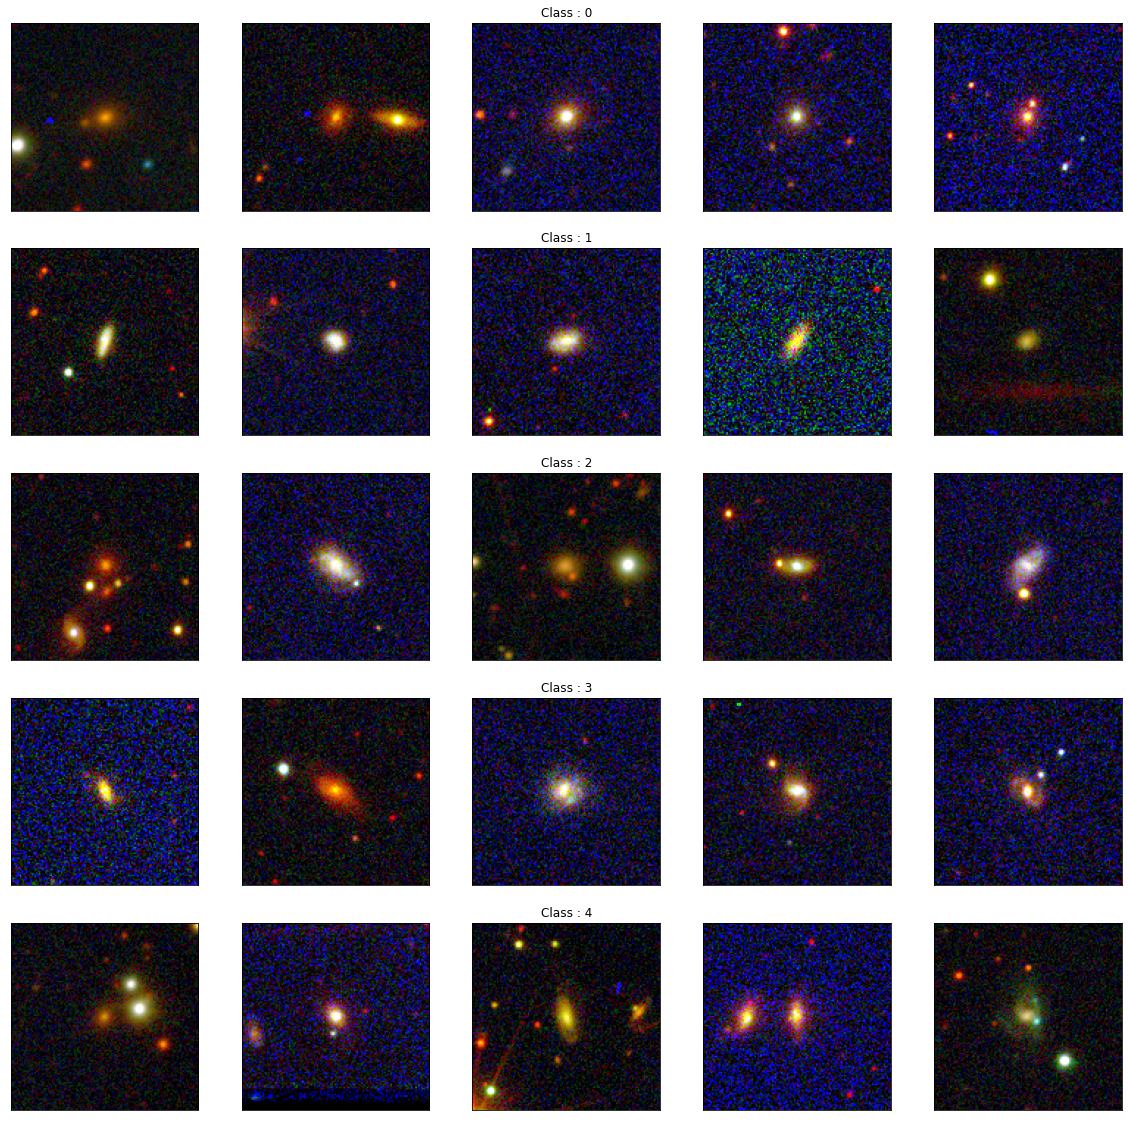

In [262]:
train_dataset = Dataset(array_of_imgs, labels)
test_dataset = Dataset(X_test, y_test)

_, axarr = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

sample_keys = list(train_dataset.data.keys())

for a in range(5):
    for b in range(5):
        temp_image = train_dataset.data[sample_keys[a]][b]
        if b == 2:
            axarr[a, b].set_title("Class : " + f'{sample_keys[int(a)]}')
        axarr[a, b].imshow(temp_image, cmap="gray")
        axarr[a, b].xaxis.set_visible(False)
        axarr[a, b].yaxis.set_visible(False)
plt.show()

In [265]:
def conv_bn(x):
    x = layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    return layers.ReLU()(x)


inputs = layers.Input(shape=(128, 128, 3))
x = conv_bn(inputs)
x = conv_bn(x)
x = conv_bn(x)
x = conv_bn(x)
x = layers.Flatten()(x)
outputs = layers.Dense(classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile()
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

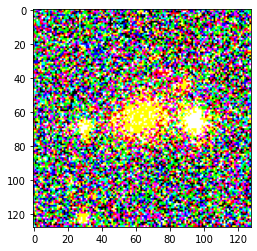

In [269]:
for images, labels in train_set:
    plt.imshow(images[0])

In [ ]:
training = []
testing = []
for meta_iter in range(meta_iters):
    frac_done = meta_iter / meta_iters
    cur_meta_step_size = (1 - frac_done) * meta_step_size
    
    # Temporarily save the weights from the model.
    old_vars = model.get_weights()
    
    # Get a sample from the full dataset.
    mini_dataset = train_dataset.get_mini_dataset(inner_batch_size, inner_iters, train_shots, classes)
    
    for images, labels in mini_dataset:
        with tf.GradientTape() as tape:
            preds = model(images)
            loss = keras.losses.sparse_categorical_crossentropy(labels, preds)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
    new_vars = model.get_weights()
    
    # Perform SGD for the meta step.
    for var in range(len(new_vars)):
        new_vars[var] = old_vars[var] + ((new_vars[var] - old_vars[var]) * cur_meta_step_size)
        
    # After the meta-learning step, reload the newly-trained weights into the model.
    model.set_weights(new_vars)
    
    # Evaluation loop
    if meta_iter % eval_interval == 0:
        accuracies = []
        #for dataset in (train_dataset, test_dataset):
        for dataset in (train_dataset, test_dataset):
            
            # Sample a mini dataset from the full dataset.
            train_set, test_images, test_labels = dataset.get_mini_dataset(eval_batch_size, eval_iters, shots, classes, split=True)
            old_vars = model.get_weights()
            
            # Train on the samples and get the resulting accuracies.
            for images, labels in train_set:
                with tf.GradientTape() as tape:
                    preds = model(images)
                    loss = keras.losses.sparse_categorical_crossentropy(labels, preds)
                grads = tape.gradient(loss, model.trainable_weights)
                optimizer.apply_gradients(zip(grads, model.trainable_weights))
            test_preds = model.predict(test_images)
            test_preds = tf.argmax(test_preds).numpy()
            num_correct = (test_preds == test_labels).sum()
            
            # Reset the weights after getting the evaluation accuracies.
            model.set_weights(old_vars)
            accuracies.append(num_correct / classes)
        training.append(accuracies[0])
        testing.append(accuracies[1])
        
        if meta_iter % 100 == 0:
            print(
                "batch %d: train=%f test=%f" % (meta_iter, accuracies[0], accuracies[1])
            )

batch 0: train=0.200000 test=0.200000


<RepeatDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float64, tf.float64)>

In [257]:
test_labels = test_dataset.get_mini_dataset(eval_batch_size, eval_iters, shots, classes, split=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0


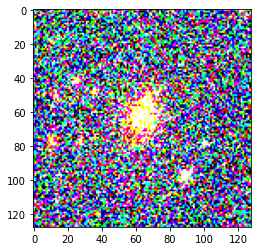

In [254]:
plt.imshow(test_images[0])
print(test_labels[0])

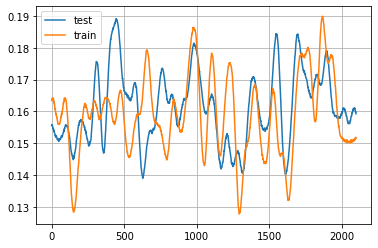

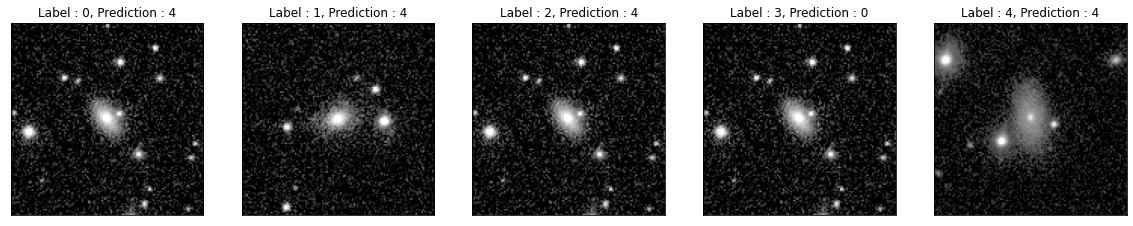

In [226]:
# First, some preprocessing to smooth the training and testing arrays for display.
window_length = 100
train_s = np.r_[
    training[window_length - 1 : 0 : -1], training, training[-1:-window_length:-1]
]
test_s = np.r_[
    testing[window_length - 1 : 0 : -1], testing, testing[-1:-window_length:-1]
]
w = np.hamming(window_length)
train_y = np.convolve(w / w.sum(), train_s, mode="valid")
test_y = np.convolve(w / w.sum(), test_s, mode="valid")

# Display the training accuracies.
x = np.arange(0, len(test_y), 1)
plt.plot(x, test_y, x, train_y)
plt.legend(["test", "train"])
plt.grid()

train_set, test_images, test_labels = dataset.get_mini_dataset(
    eval_batch_size, eval_iters, shots, classes, split=True
)
for images, labels in train_set:
    with tf.GradientTape() as tape:
        preds = model(images)
        loss = keras.losses.sparse_categorical_crossentropy(labels, preds)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
test_preds = model.predict(test_images)
test_preds = tf.argmax(test_preds).numpy()

_, axarr = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

sample_keys = list(train_dataset.data.keys())

for i, ax in zip(range(5), axarr):
    temp_image = np.stack((test_images[i, :, :, 0],) * 3, axis=2)
    temp_image = np.clip(temp_image, 0, 255).astype("uint8")
    
    ax.set_title(
        "Label : {}, Prediction : {}".format(int(test_labels[i]), test_preds[i])
    )
    ax.imshow(temp_image)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

In [ ]:
plt.imshow(test_)